# Sobre o trabalho

O trabalho a seguir foi feito utilizando dados obtidos de um questionário de pesquisa de intenção de voto da eleição para prefeito de Coari do ano de 2012. 


# Preparação do dataframe

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom, nbinom, poisson, uniform, expon, norm 
import statistics as st
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [2]:
# Download do Dataframe abaixo
!npx degit wfsilva-uea/coari/coari_db_filtrado.csv coari_db.csv -f

npx: installed 1 in 2.425s
> cloned wfsilva-uea/coari#master to coari_db.csv


In [3]:
types = {
  'Idade': int, 
  'Genero': str, 
  'Faixa': str, 
  'Bairro': str, 
  'Prioridade': str, 
  'Intencao': str, 
  'Por Omar': str, 
  'Por Braga': str, 
}
# Abertura inicial do dataframe
df = pd.read_csv('coari_db.csv', dtype=types)
df["Intencao"].replace({
    'g': 'Outros',    
    'f': 'Nulo',    
    'h': 'Outros'
}, inplace=True)
df2 = df.copy()

## Preparação de Funções


In [4]:
# Coeficiente de variação

def cv(n):
  return round(100*st.stdev(n)/st.mean(n), 2)


# Leitura do dataframe

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    461 non-null    int64  
 1   Idade         461 non-null    int64  
 2   Faixa         461 non-null    object 
 3   Bairro        461 non-null    object 
 4   Genero        461 non-null    object 
 5   Prioridade    453 non-null    object 
 6   Intencao      425 non-null    object 
 7   Por Omar      461 non-null    object 
 8   Por Braga     460 non-null    object 
 9   Escolaridade  461 non-null    object 
 10  Renda         415 non-null    float64
dtypes: float64(1), int64(2), object(8)
memory usage: 39.7+ KB


**Conclusão do comando info()**: a coluna "intenção de voto" e "prioridades em coari" apresentam a maior taixa de dados nulos (por conta do entrevistado não quis responder). a coluna "votaria em quem for indicado pelo Braga" apresenta 1 uma pessoa que não quis responder.

In [6]:
df.tail() 
# aperto apenas final para confirmar total de 461 (0-460) itens presente no dataframe.


,Unnamed: 0,Idade,Faixa,Bairro,Genero,Prioridade,Intencao,Por Omar,Por Braga,Escolaridade,Renda
456,456,16,16 e 17,Do Pera,Masculino,Segurança,Adail,Sim,Sim,Não Alfabetizado,NaN
457,457,37,30 a 39,Do Pera,Masculino,Infraestrutura,Adail,Sem Opinião,Sim,Fundam. Completo,700.0
458,458,30,30 a 39,Do Pera,Masculino,Emprego,Adail,Sim,Não,Médio Completo,1300.0
459,459,32,30 a 39,Do Pera,Masculino,Emprego,Adail,Sem Opinião,Sem Opinião,Fundam. Incompleto,NaN
460,460,54,50 a 59,Do Pera,Feminino,Emprego,Adail,Sim,Não,Fundam. Incompleto,450.0


## Divisão Populacional por Gênero

In [7]:
val_genero = df["Genero"].value_counts()
val_genero

Feminino     232
Masculino    229
Name: Genero, dtype: int64

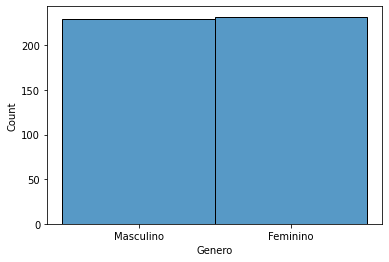

In [8]:
sns.histplot(df2["Genero"])

In [45]:
qt9 = val_genero
fig = go.Figure(data=[go.Pie(labels=qt9.keys(),values=qt9.values,title="Divisão por Gênero")])
fig.show()

## Divisão Populacional por Bairro

In [9]:
val_bairro = df["Bairro"].value_counts()
val_bairro

Chagas            60
União             55
Urucu             55
Centro            54
Itamarati         47
Tauá Mirim        47
Santa Efigênia    31
Duque             29
Santa Helena      28
Do Pera           28
Espirito Santo    23
Z - Rural          3
centro             1
Name: Bairro, dtype: int64

In [44]:
qt9 = val_bairro
fig = go.Figure(data=[go.Pie(labels=qt9.keys(),values=qt9.values,title="Divisão por Bairro")])
fig.show()

## Divisão Populacional por Faixa Etária

In [10]:
val_idade = df["Idade"].value_counts()
val_idade

18    29
19    21
21    21
29    21
30    17
      ..
68     1
66     1
65     1
80     1
91     1
Name: Idade, Length: 61, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



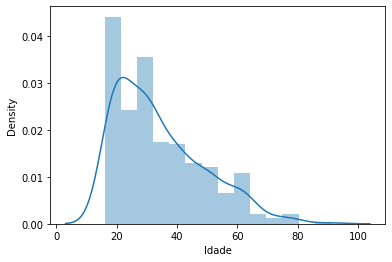

In [11]:
sns.distplot(df["Idade"], kde=True)

In [12]:
fig = px.histogram(df['Idade'],"Idade")
fig.show()

In [13]:
val_faixa = df["Faixa"].value_counts()
val_faixa

30 a 39    99
18 a 21    85
40 a 49    65
25 a 29    63
22 a 24    44
50 a 59    42
60 e +     39
16 e 17    24
Name: Faixa, dtype: int64

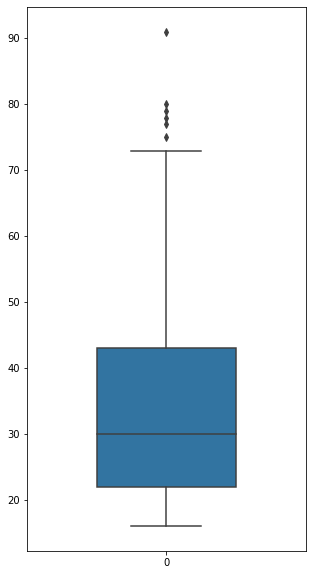

In [14]:
plt.figure(figsize=(5,10))
sns.boxplot(data=df["Idade"],orient="v", width=0.5)
plt.show()

In [15]:
fig = px.box(df, y='Idade')
fig.show()

In [16]:
"média, mediana, moda, desvio-padrão, coeficiente de variação e simetria das variáveis quantitativas"
print(f"Média aritmética: {df2.Idade.mean():.2f}")
print(f"Médiana: {df2.Idade.median()}")
print(f"Moda: {st.mode(df2.Idade)}")
print(f"Desvio Padrão: {st.stdev(df2.Idade):.2f}")
print(f"Média Harmonica: {(st.harmonic_mean(df2.Idade)):.2f}")
print(f'Coeficiente de Variação: {cv(df2.Idade):.2f}')
print('Quartil: (Min, Q1, Q2, Q3, Max) ', np.quantile(df2.Idade, [0, 0.25, 0.5, 0.75, 1]))

Média aritmética: 34.18
Médiana: 30.0
Moda: 18
Desvio Padrão: 14.67
Média Harmonica: 28.92
Coeficiente de Variação: 42.93
Quartil: (Min, Q1, Q2, Q3, Max)  [16. 22. 30. 43. 91.]


### Tabela cruzada "Genero" x "Faixa Etária"

In [17]:
tab02=pd.crosstab(df["Genero"],df["Faixa"],margins=True)
tab02

Faixa,16 e 17,18 a 21,22 a 24,25 a 29,30 a 39,40 a 49,50 a 59,60 e +,All
Genero,,,,,,,,,
Feminino,14,45,22,34,47,31,17,22,232
Masculino,10,40,22,29,52,34,25,17,229
All,24,85,44,63,99,65,42,39,461


## Divisão Populacional segundo Problema Prioritário

In [18]:
val_prioridade = df["Prioridade"].value_counts()
val_prioridade

Emprego                     122
Saúde                       121
Segurança                    39
Salário                      29
Corrupção                    25
Asfalto                      19
Saneamento e urbanização     19
Infraestrutura               16
Educação                     16
Renda                        14
Administração pública         9
Outros                        9
Moradia                       8
Energia                       4
Água                          2
Transporte                    1
Name: Prioridade, dtype: int64

In [46]:
fig = px.histogram(df['Prioridade'],"Prioridade")
fig.show()

In [47]:
qt9 = val_prioridade
fig = go.Figure(data=[go.Pie(labels=qt9.keys(),values=qt9.values,title="Divisão por Prioridade")])
fig.show()

### Tabela cruzada "Prioridade em Coari" x "Bairro"

In [20]:
tab03=pd.crosstab(df2["Prioridade"],df2["Bairro"],margins=True)
tab03

Bairro,Centro,Chagas,Do Pera,Duque,Espirito Santo,Itamarati,Santa Efigênia,Santa Helena,Tauá Mirim,União,Urucu,Z - Rural,centro,All
Prioridade,,,,,,,,,,,,,,
Administração pública,0,2,0,0,2,2,0,0,1,1,1,0,0,9
Asfalto,0,4,0,3,0,5,0,2,0,1,4,0,0,19
Corrupção,3,3,2,3,0,2,2,1,0,6,1,2,0,25
Educação,3,1,1,2,0,1,0,0,3,1,4,0,0,16
Emprego,10,12,8,9,6,13,10,9,11,21,11,1,1,122
Energia,0,0,0,0,0,1,0,0,0,0,3,0,0,4
Infraestrutura,2,1,3,0,1,1,0,3,2,2,1,0,0,16
Moradia,0,1,1,0,0,2,1,0,2,0,1,0,0,8
Outros,1,0,1,1,0,0,0,1,3,1,1,0,0,9


## Divisão Populacional segundo pretenção de voto

In [21]:
val_intencao = df["Intencao"].value_counts()
val_intencao

Adail        174
Magalhaes    137
Nulo          50
Mitouso       45
indeciso       9
Iran           7
Outros         2
C.T.           1
Name: Intencao, dtype: int64

In [22]:
# Percentual de Intenção de Votos
fig = go.Figure(data=[go.Pie(labels=df2['Intencao'].value_counts().keys(), values = df2['Intencao'].value_counts().values, pull=[0.2])])
fig.show()

In [23]:
fig = go.Figure(data=[go.Pie(labels=val_intencao.keys(),values=val_intencao.values)])
fig.show()

In [24]:
intencao_adail = df2.query('`Intencao` == "Adail"')
intencao_magalhaes = df2.query('`Intencao` == "Magalhaes"')
intencao_mitouso = df2.query('`Intencao` == "Mitouso"')
intencao_nulo = df2.query('`Intencao` == "Nulo"')
intencao_indeciso = df2.query('`Intencao` == "indeciso"')
hist_data = [intencao_adail.Faixa.value_counts(),intencao_magalhaes.Faixa.value_counts(),intencao_mitouso.Faixa.value_counts()]
labels = ["Adail", "Magalhaes", "Mitouso"]
fig = ff.create_distplot(hist_data,labels, bin_size=.2, show_rug=False)
fig.show()

### Tabela cruzada "Intenção de Voto" x "Faixa Etária"

In [25]:
tab04=pd.crosstab(df["Intencao"],df["Faixa"],margins=True)
tab04

Faixa,16 e 17,18 a 21,22 a 24,25 a 29,30 a 39,40 a 49,50 a 59,60 e +,All
Intencao,,,,,,,,,
Adail,8,27,14,28,46,27,15,9,174
C.T.,0,0,1,0,0,0,0,0,1
Iran,2,2,0,1,1,0,1,0,7
Magalhaes,10,33,19,19,18,16,13,9,137
Mitouso,1,6,4,5,10,6,4,9,45
Nulo,0,12,3,7,11,7,3,7,50
Outros,0,1,1,0,0,0,0,0,2
indeciso,0,1,0,2,3,1,2,0,9
All,21,82,42,62,89,57,38,34,425


### Gráfico de Intenção x Gênero

In [49]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df.query('`Genero` == "Feminino"')['Intencao'].value_counts().keys(),
    y=df.query('`Genero` == "Feminino"')['Intencao'].value_counts().values,
    name='Voto Feminino',
    marker_color='pink'
))
fig.add_trace(go.Bar(
    x=df.query('`Genero` == "Masculino"')['Intencao'].value_counts().keys(),
    y=df.query('`Genero` == "Masculino"')['Intencao'].value_counts().values,
    name='Voto Masculino',
    marker_color='lightblue'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

## Divisão Populacional segundo influência Omar x Braga

In [26]:
val_omar = df["Por Omar"].value_counts()
val_omar

Sem Opinião    183
Sim            158
Não            120
Name: Por Omar, dtype: int64

In [27]:
qt9 = val_omar
fig = go.Figure(data=[go.Pie(labels=qt9.keys(),values=qt9.values,title="Votaria no candidato indicado por Omar")])
fig.show()

In [28]:
val_braga = df["Por Braga"].value_counts()
val_braga

Sim            178
Sem Opinião    143
Não            138
b                1
Name: Por Braga, dtype: int64

In [29]:
qt9 = val_braga
fig = go.Figure(data=[go.Pie(labels=qt9.keys(),values=qt9.values,title="Votaria no candidato indicado por Braga")])
fig.show()

### Tabela cruzada "Braga" x "Bairro"

In [30]:
tab01=pd.crosstab(df["Por Braga"],df["Bairro"],margins=True)
tab01

Bairro,Centro,Chagas,Do Pera,Duque,Espirito Santo,Itamarati,Santa Efigênia,Santa Helena,Tauá Mirim,União,Urucu,Z - Rural,centro,All
Por Braga,,,,,,,,,,,,,,
Não,15,11,7,12,7,10,14,7,22,12,20,0,1,138
Sem Opinião,15,19,11,8,8,18,7,11,11,19,14,2,0,143
Sim,23,30,10,9,8,19,10,10,14,23,21,1,0,178
b,0,0,0,0,0,0,0,0,0,1,0,0,0,1
All,53,60,28,29,23,47,31,28,47,55,55,3,1,460


### Tabela cruzada "Omar" x "Bairro"

In [31]:
tab00=pd.crosstab(df["Por Omar"],df["Bairro"],margins=True)
tab00
# tabela cruzada entre influência por Braga e por Omar

Bairro,Centro,Chagas,Do Pera,Duque,Espirito Santo,Itamarati,Santa Efigênia,Santa Helena,Tauá Mirim,União,Urucu,Z - Rural,centro,All
Por Omar,,,,,,,,,,,,,,
Não,8,17,4,10,8,11,7,4,23,11,17,0,0,120
Sem Opinião,20,21,9,11,9,21,13,17,16,25,19,1,1,183
Sim,26,22,15,8,6,15,11,7,8,19,19,2,0,158
All,54,60,28,29,23,47,31,28,47,55,55,3,1,461


## Divisão Populacional por Escolaridade

In [32]:
val_escola = df["Escolaridade"].value_counts()
val_escola

Médio Completo         155
Fundam. Incompleto     111
Médio Incompleto        73
Não Alfabetizado        29
Fundam. Completo        28
Apenas Alfabetizado     26
Superior Incompleto     20
Pós graduação           19
Name: Escolaridade, dtype: int64

In [50]:
fig = px.bar(df, x = df['Escolaridade'].value_counts().keys(), y = df['Escolaridade'].value_counts().values, labels={"x":"Grau de Educação","y":"Quantidade"})
fig.show()

### Tabela cruzada "Escolaridade" x "Intencao"

In [33]:
intecao_escolaridade = df2.groupby(['Intencao', 'Escolaridade']).count()
intecao_escolaridade

Unnamed: 0  Idade  ...  Por Braga  Renda
Intencao  Escolaridade                            ...                  
Adail     Apenas Alfabetizado          19     19  ...         19     16
          Fundam. Completo             14     14  ...         14     14
          Fundam. Incompleto           47     47  ...         47     41
          Médio Completo               53     53  ...         53     48
          Médio Incompleto             30     30  ...         30     30
          Não Alfabetizado              7      7  ...          7      5
          Pós graduação                 2      2  ...          2      2
          Superior Incompleto           2      2  ...          2      2
C.T.      Fundam. Incompleto            1      1  ...          1      0
Iran      Fundam. Incompleto            1      1  ...          1      1
          Médio Completo                3      3  ...          3      3
          Médio Incompleto              3      3  ...          3      2
Magalhaes Apenas Alfabetizado           3      3  ...          3      3
          Fundam. Completo             10     10  ...         10     10
          Fundam. Incompleto           27     27  ...         27     25
          Médio Completo               47     47  ...         47     46
          Médio Incompleto             24     24  ...         24     18
          Não Alfabetizado              5      5  ...          5      5
          Pós graduação                11     11  ...         10     11
          Superior Incompleto          10     10  ...         10     10
Mitouso   Fundam. Completo              2      2  ...          2      2
          Fundam. Incompleto            7      7  ...          7      6
          Médio Completo               20     20  ...         20     19
          Médio Incompleto              3      3  ...          3      2
          Não Alfabetizado              8      8  ...          8      6
          Pós graduação                 2      2  ...          2      1
          Superior Incompleto           3      3  ...          3      3
Nulo      Fundam. Completo              2      2  ...          2      1
          Fundam. Incompleto           16     16  ...         16     13
          Médio Completo               20     20  ...         20     18
          Médio Incompleto              5      5  ...          5      4
          Não Alfabetizado              2      2  ...          2      2
          Pós graduação                 2      2  ...          2      2
          Superior Incompleto           3      3  ...          3      3
Outros    Médio Completo                1      1  ...          1      1
          Pós graduação                 1      1  ...          1      0
indeciso  Fundam. Incompleto            2      2  ...          2      1
          Médio Completo                3      3  ...          3      3
          Médio Incompleto              2      2  ...          2      2
          Pós graduação                 1      1  ...          1      1
          Superior Incompleto           1      1  ...          1      1

[41 rows x 9 columns]

In [51]:
x_ = df['Escolaridade'].value_counts().keys()
y_ = df['Escolaridade'].value_counts().values
fig = go.Figure(data=[go.Bar(
    x = x_, y = y_,
    text=y_,
    textposition='auto',)])
fig.show()

## Divisão Populacional por Renda

In [34]:
val_renda = df["Renda"].value_counts()
val_renda

650.0     91
1000.0    41
1300.0    38
600.0     25
2000.0    24
          ..
135.0      1
980.0      1
120.0      1
240.0      1
640.0      1
Name: Renda, Length: 64, dtype: int64

In [35]:
"média, mediana, moda, desvio-padrão, coeficiente de variação e simetria das variáveis quantitativas"
print(f"Média aritmética: {df2.Renda.mean():.2f}")
print(f"Médiana: {df2.Renda.median()}")
print(f"Moda: {st.mode(df2.Renda)}")
print(f"Desvio Padrão: {st.stdev(df2.Renda):.2f}")
print(f"Média Harmonica: {(st.harmonic_mean(df2.Renda)):.2f}")
#print(f'Coeficiente de Variação: {cv(df2.Renda):.2f}')
print('Quartil: (Min, Q1, Q2, Q3, Max) ', np.quantile(df2.Renda, [0, 0.25, 0.5, 0.75, 1]))

Média aritmética: 1677.01
Médiana: 800.0
Moda: 650.0
Desvio Padrão: nan
Média Harmonica: 0.00
Quartil: (Min, Q1, Q2, Q3, Max)  [nan nan nan nan nan]


In [36]:
qt9 = val_renda
fig = go.Figure(data=[go.Pie(labels=qt9.keys(),values=qt9.values,title="Divisão por Renda")])
fig.show()

#### Dados Cruzados de Renda por Faixa Etária

In [37]:
df_faixa_renda = df.groupby(by=['Faixa'])['Renda'].mean()
df_faixa_renda

Faixa
16 e 17    1387.000000
18 a 21    1204.589041
22 a 24    1101.615385
25 a 29    1307.965517
30 a 39    2953.720430
40 a 49    1659.034483
50 a 59    1368.184211
60 e +     1070.833333
Name: Renda, dtype: float64

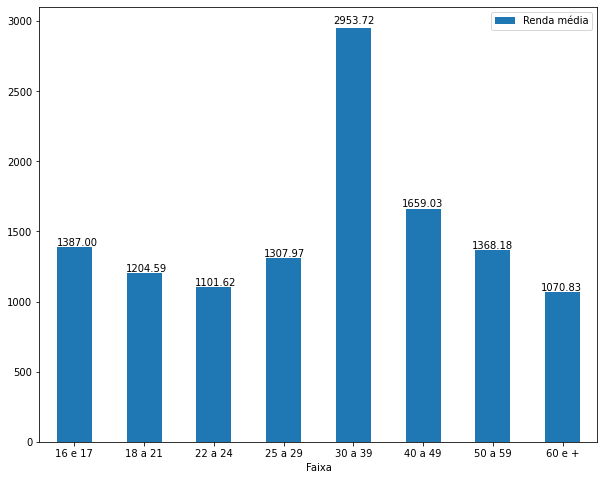

In [38]:
df_faixa_renda_plot = df_faixa_renda.to_frame(name='Renda média')
ax = df_faixa_renda_plot.plot.bar(y='Renda média', rot=0, figsize=(10, 8))
for p in ax.patches:
    ax.annotate('%.2f' % p.get_height(), (p.get_x() * .99, p.get_height() * 1.009))

### Dados Cruzados Renda por Faixa Etária por Intenção de Voto

In [39]:
df_faixa_renda = df.groupby(by=['Faixa', 'Intencao'])['Renda'].mean().to_frame().reset_index()
df_pivot_table = pd.pivot_table(df_faixa_renda, values='Renda', index='Intencao', columns='Faixa', fill_value='-', margins=True)
df_pivot_table = df_pivot_table.drop(index='All').rename(columns={'All': 'Total'})
df_pivot_table = df_pivot_table.reindex(df_pivot_table['Total'].sort_values(ascending=False).index)
df_pivot_table

Faixa,16 e 17,18 a 21,22 a 24,25 a 29,30 a 39,40 a 49,50 a 59,60 e +,Total
Intencao,,,,,,,,,
indeciso,-,1300,-,5150,1150,1800,475,-,1975
Mitouso,100,1090,3800,1020,1316.67,2900,2200,906.25,1666.61
Magalhaes,1943.75,1422.5,1041.67,1344.44,2063.06,1446.88,965.385,1833.33,1507.63
Adail,1070,941.391,740.214,1195.38,4426.07,1070.17,1715.38,816.667,1496.91
Iran,500,650,-,500,2000,-,3141,-,1358.2
Nulo,-,1442,675,856.4,1319,3518.57,825,714.286,1335.75
Outros,-,883,-,-,-,-,-,-,883
